In [38]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
series = pd.read_csv('AirPassengers.csv', index_col='Month')
series

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [40]:
series.columns = ['Y']
series

,Y
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


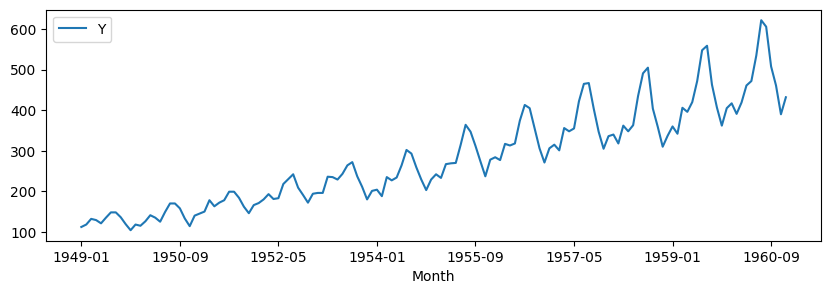

In [41]:
mpl.rcParams['figure.figsize']=[10,3]
series.plot()
plt.show()

In [42]:
acf_value= acf(series)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

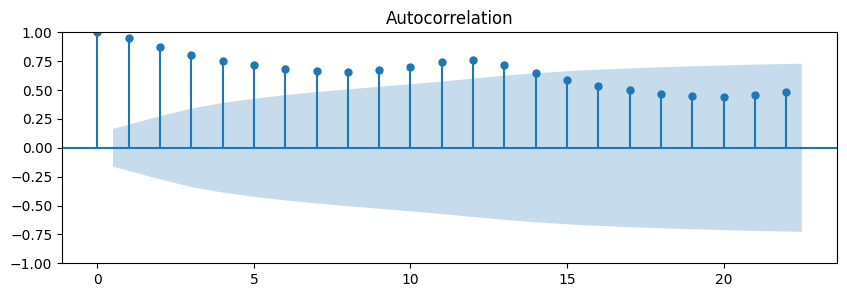

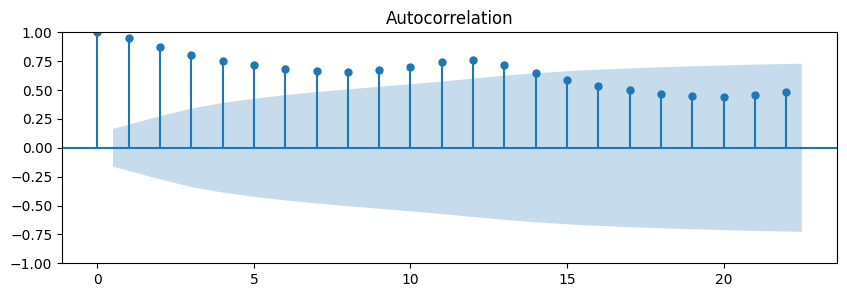

In [43]:
plot_acf(series)

In [44]:
pacf_value=pacf(series)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

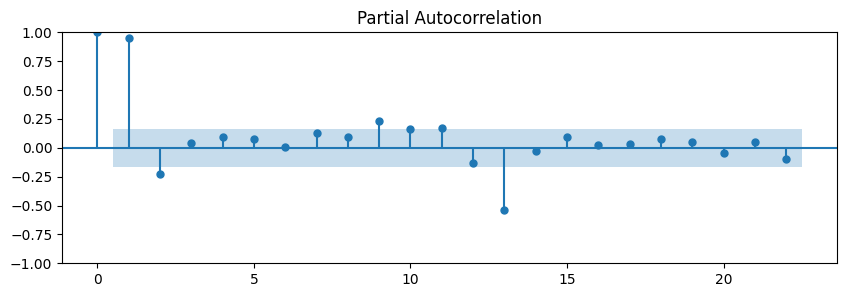

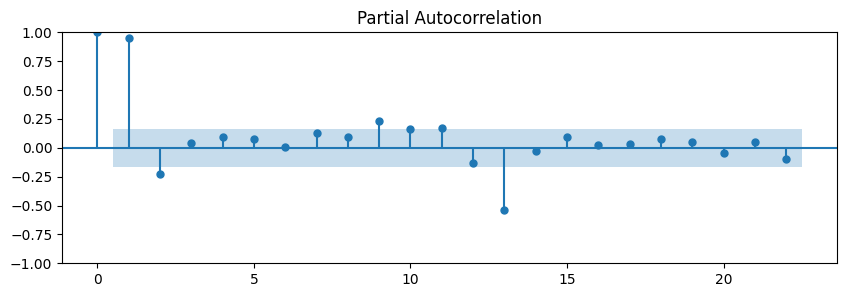

In [45]:
plot_pacf(series)

In [46]:
import statsmodels.api as sa

In [47]:
train = series['1949':'1959']
train
test = series['1959':'1961']


In [48]:
model_ARIMA = sa.tsa.ARIMA(train).fit()

In [49]:
model_ARIMA.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  120
Model:                          ARIMA   Log Likelihood                -716.163
Date:                Sat, 09 Sep 2023   AIC                           1436.325
Time:                        11:52:57   BIC                           1441.900
Sample:                    01-01-1949   HQIC                          1438.589
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|        [0.0        1.0]
------------------------------------------------------------------------------
const        245.9083      9.695     25.364      0.000        -inf         inf
sigma2      8932.0412   1438.175      6.211      0.000        -inf         inf
===================================================================================
Ljung-Box (L1) (Q):                 109.17   Jarque-Bera (JB):                 7.49
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.48   Skew:                             0.58
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
pred = model_ARIMA.predict(120, 143, typ='levels')
pred

1959-01-01    245.908319
1959-02-01    245.908319
1959-03-01    245.908319
1959-04-01    245.908319
1959-05-01    245.908319
1959-06-01    245.908319
1959-07-01    245.908319
1959-08-01    245.908319
1959-09-01    245.908319
1959-10-01    245.908319
1959-11-01    245.908319
1959-12-01    245.908319
1960-01-01    245.908319
1960-02-01    245.908319
1960-03-01    245.908319
1960-04-01    245.908319
1960-05-01    245.908319
1960-06-01    245.908319
1960-07-01    245.908319
1960-08-01    245.908319
1960-09-01    245.908319
1960-10-01    245.908319
1960-11-01    245.908319
1960-12-01    245.908319
Freq: MS, Name: predicted_mean, dtype: float64

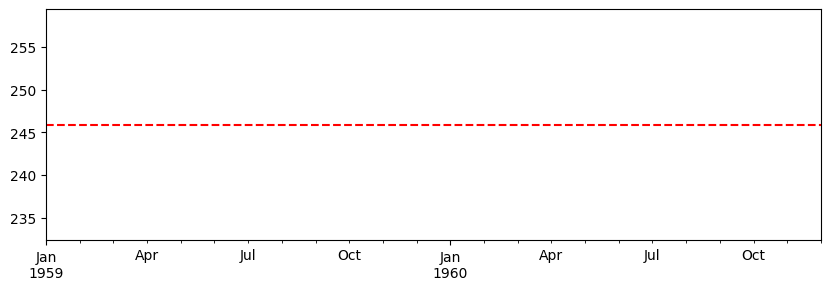

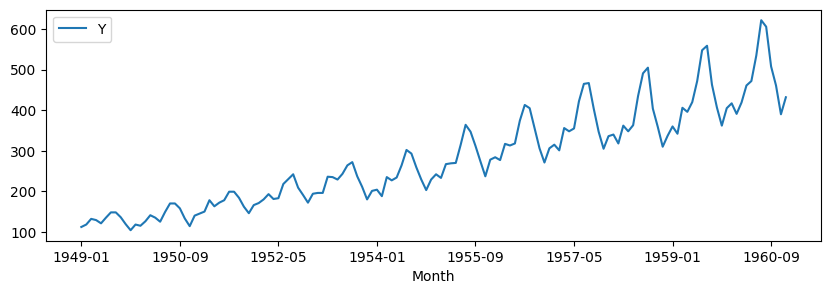

In [51]:
mpl.rcParams['figure.figsize']=[10,3]

pred.plot(style='r--')
series.plot()

plt.show()

In [52]:
comp = series[119:143]
comp

,Y
Month,
1958-12,337
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559


In [53]:
# !pip install ml_metrics==0.1.4

In [54]:
import ml_metrics as metrix

In [55]:
# якісь трабли з пакетом ml_metrics
from statsmodels.tsa.stattools import adfuller
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стаціонарність:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значення = {:.3f}".format(dftest[1]))
    print("Критичне значення :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Дані {} стационарні з ймовірністю {}% відсотків".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартна похибка:', round(((real-forecast)**2).mean()**0.5,4)) 

In [56]:
print(metrics(comp, pred))
print(metrix.mae(comp, pred))
print(metrix.rmse(comp, pred))


Тест на стаціонарність:
	T-статистика = -2.764
	P-значення = 0.064
Критичне значення :
	1%: -3.769732625845229 - Дані не стационарні з ймовірністю 99% відсотків
	5%: -3.005425537190083 - Дані не стационарні з ймовірністю 95% відсотків
	10%: -2.6425009917355373 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 202.3833
MSE: 47056.3927
MAPE: 0.4357
MPE: 0.4357
Стандартна похибка: 216.9249
None
202.3833477057391
216.92485494398974


In [57]:
from pmdarima import auto_arima

In [58]:
model_param = auto_arima(train, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
model_param

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=813.749, Time=2.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=810.646, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1060.479, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=809.411, Time=0.13 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=810.721, Time=0.44 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=812.509, Time=1.26 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=808.863, Time=0.16 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=810.482, Time=0.79 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=810.553, Time=0.45 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=809.375, Time=0.41 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=809.672, Time=0.27 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [59]:
model_SARIMAX = sa.tsa.statespace.SARIMAX(train, order=(2,0,0), seasonal_order=(0,1,0, 12)).fit()

In [60]:
model_SARIMAX.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  Y   No. Observations:                  120
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -403.120
Date:                            Sat, 09 Sep 2023   AIC                            812.240
Time:                                    11:53:23   BIC                            820.287
Sample:                                01-01-1949   HQIC                           815.503
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|        [0.0        1.0]
------------------------------------------------------------------------------
ar.L1          0.7325      0.088      8.291      0.000        -inf         inf
ar.L2          0.2189      0.093      2.358      0.018        -inf         inf
sigma2       100.1812     11.847      8.456      0.000        -inf         inf
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.99   Prob(JB):                         0.31
Heteroskedasticity (H):               1.36   Skew:                             0.02
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred = model_SARIMAX.predict(120, 143)

<Axes: xlabel='Month'>

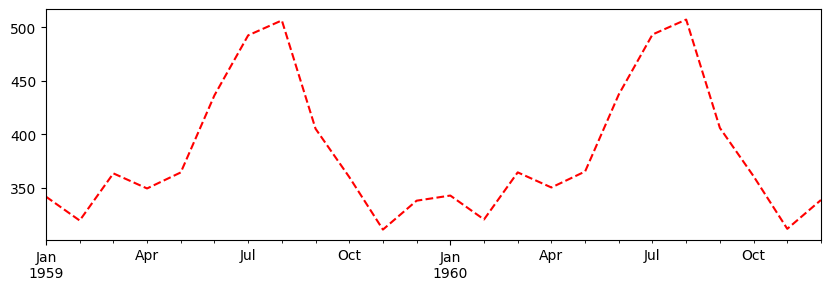

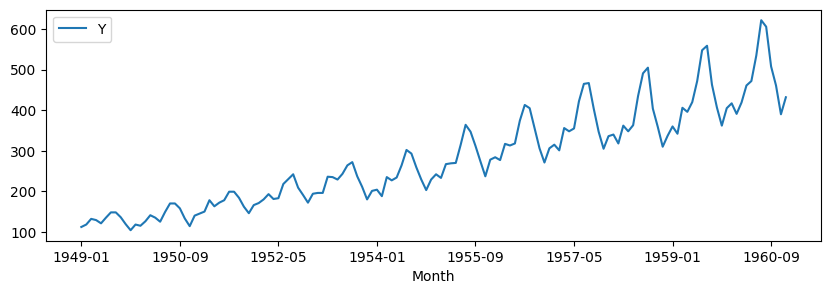

In [62]:
pred.plot(style='r--')
series.plot()


In [63]:
print(metrics(comp, pred))
print(metrix.mae(comp, pred))
print(metrix.rmse(comp, pred))

Тест на стаціонарність:
	T-статистика = -2.823
	P-значення = 0.055
Критичне значення :
	1%: -3.7529275211638033 - Дані не стационарні з ймовірністю 99% відсотків
	5%: -2.998499866852963 - Дані не стационарні з ймовірністю 95% відсотків
	10%: -2.6389669754253307 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 70.775
MSE: 7634.3376
MAPE: 0.1501
MPE: 0.1368
Стандартна похибка: 87.3747
None
95.3689841387891
119.1729527123615


In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_HW = ExponentialSmoothing(train).fit()
pred = model_HW.predict(120, 143)

<Axes: xlabel='Month'>

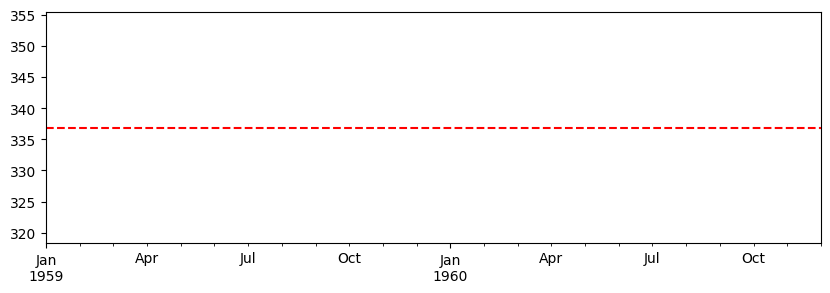

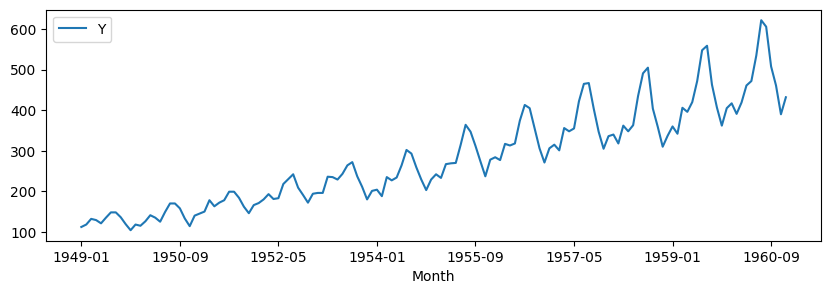

In [65]:
pred.plot(style='r--')
series.plot()


In [66]:
print(metrics(comp, pred))
print(metrix.mae(comp, pred))
print(metrix.rmse(comp, pred))

Тест на стаціонарність:
	T-статистика = -2.764
	P-значення = 0.064
Критичне значення :
	1%: -3.769732625845229 - Дані не стационарні з ймовірністю 99% відсотків
	5%: -3.005425537190083 - Дані не стационарні з ймовірністю 95% відсотків
	10%: -2.6425009917355373 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 111.4254
MSE: 18513.001
MAPE: 0.2269
MPE: 0.2269
Стандартна похибка: 136.0625
None
111.42543597858631
136.06248949253768


Sarimax найкраще підходить для даного часового ряду